# Mapping Notebook

## Import modules

In [2]:
import os
import pandas as pd
import json

## Creating input file for download and processing script

Downloaded from [**here**](https://www.ebi.ac.uk/biostudies/arrayexpress/studies/E-MTAB-12916?query=E-MTAB-12916)

In [3]:
data_path = '../../raw_data/'
meta_data_file = 'E-MTAB-12916.sdrf.txt'

In [4]:
meta_data = pd.read_csv(os.path.join(data_path, meta_data_file), sep='\t')
meta_data

,Source Name,Comment[ENA_SAMPLE],Comment[BioSD_SAMPLE],Characteristics[organism],Characteristics[age],Characteristics[developmental stage],Characteristics[sex],Characteristics[individual],Characteristics[organism part],Characteristics[disease],...,Assay Name,Technology Type,Comment[ENA_EXPERIMENT],Scan Name,Comment[SUBMITTED_FILE_NAME],Comment[ENA_RUN],Comment[FASTQ_URI],Comment[read_index],Comment[read_type],Factor Value[organism part]
0,HCAHeart9508627,ERS15408104,SAMEA113412973,Homo sapiens,55 to 60,adult,Male,D3,heart left ventricle,normal,...,HCAHeart9508627,sequencing assay,ERX10811380,HCAHeart9508627_S1_L001_I1_001.fastq.gz,HCAHeart9508627_S1_L001_I1_001.fastq.gz,ERR11403589,ftp://ftp.sra.ebi.ac.uk/vol1/run/ERR114/ERR114...,index1,sample_barcode,heart left ventricle
1,HCAHeart9508627,ERS15408104,SAMEA113412973,Homo sapiens,55 to 60,adult,Male,D3,heart left ventricle,normal,...,HCAHeart9508627,sequencing assay,ERX10811380,HCAHeart9508627_S1_L001_I2_001.fastq.gz,HCAHeart9508627_S1_L001_I2_001.fastq.gz,ERR11403589,ftp://ftp.sra.ebi.ac.uk/vol1/run/ERR114/ERR114...,index2,sample_barcode,heart left ventricle
2,HCAHeart9508627,ERS15408104,SAMEA113412973,Homo sapiens,55 to 60,adult,Male,D3,heart left ventricle,normal,...,HCAHeart9508627,sequencing assay,ERX10811380,HCAHeart9508627_S1_L001_R1_001.fastq.gz,HCAHeart9508627_S1_L001_R1_001.fastq.gz,ERR11403589,ftp://ftp.sra.ebi.ac.uk/vol1/run/ERR114/ERR114...,read1,"cell_barcode,umi_barcode",heart left ventricle
3,HCAHeart9508627,ERS15408104,SAMEA113412973,Homo sapiens,55 to 60,adult,Male,D3,heart left ventricle,normal,...,HCAHeart9508627,sequencing assay,ERX10811380,HCAHeart9508627_S1_L001_R2_001.fastq.gz,HCAHeart9508627_S1_L001_R2_001.fastq.gz,ERR11403589,ftp://ftp.sra.ebi.ac.uk/vol1/run/ERR114/ERR114...,read2,single,heart left ventricle
4,HCAHeart9508628,ERS15408105,SAMEA113412974,Homo sapiens,60 to 65,adult,Male,D7,right cardiac atrium,normal,...,HCAHeart9508628,sequencing assay,ERX10811381,HCAHeart9508628_S1_L001_I1_001.fastq.gz,HCAHeart9508628_S1_L001_I1_001.fastq.gz,ERR11403590,ftp://ftp.sra.ebi.ac.uk/vol1/run/ERR114/ERR114...,index1,sample_barcode,right cardiac atrium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,HCAHeartST13189996,ERS15408149,SAMEA113413018,Homo sapiens,70 to 75,adult,Female,AV13,atrioventriculeft cardiac atriumr node,normal,...,HCAHeartST13189996,sequencing assay,ERX10811425,HCAHeartST13189996_S1_L001_R2_001.fastq.gz,HCAHeartST13189996_S1_L001_R2_001.fastq.gz,ERR11403634,ftp://ftp.sra.ebi.ac.uk/vol1/run/ERR114/ERR114...,read2,single,atrioventriculeft cardiac atriumr node
184,HCAHeartST13189997,ERS15408150,SAMEA113413019,Homo sapiens,70 to 75,adult,Female,AV13,atrioventriculeft cardiac atriumr node,normal,...,HCAHeartST13189997,sequencing assay,ERX10811426,HCAHeartST13189997_S1_L001_I1_001.fastq.gz,HCAHeartST13189997_S1_L001_I1_001.fastq.gz,ERR11403635,ftp://ftp.sra.ebi.ac.uk/vol1/run/ERR114/ERR114...,index1,sample_barcode,atrioventriculeft cardiac atriumr node
185,HCAHeartST13189997,ERS15408150,SAMEA113413019,Homo sapiens,70 to 75,adult,Female,AV13,atrioventriculeft cardiac atriumr node,normal,...,HCAHeartST13189997,sequencing assay,ERX10811426,HCAHeartST13189997_S1_L001_I2_001.fastq.gz,HCAHeartST13189997_S1_L001_I2_001.fastq.gz,ERR11403635,ftp://ftp.sra.ebi.ac.uk/vol1/run/ERR114/ERR114...,index2,sample_barcode,atrioventriculeft cardiac atriumr node
186,HCAHeartST13189997,ERS15408150,SAMEA113413019,Homo sapiens,70 to 75,adult,Female,AV13,atrioventriculeft cardiac atriumr node,normal,...,HCAHeartST13189997,sequencing assay,ERX10811426,HCAHeartST13189997_S1_L001_R1_001.fastq.gz,HCAHeartST13189997_S1_L001_R1_001.fastq.gz,ERR11403635,ftp://ftp.sra.ebi.ac.uk/vol1/run/ERR114/ERR114...,read1,"cell_barcode,umi_barcode",atrioventriculeft cardiac atriumr node


In [4]:
meta_data = meta_data[['Source Name', 'Comment[FASTQ_URI]', 'Comment[SUBMITTED_FILE_NAME]']]
meta_data.to_csv('../../raw_data/downloads_table.csv', header=None)
meta_data

,Source Name,Comment[FASTQ_URI],Comment[SUBMITTED_FILE_NAME]
0,HCAHeart9508627,ftp://ftp.sra.ebi.ac.uk/vol1/run/ERR114/ERR114...,HCAHeart9508627_S1_L001_I1_001.fastq.gz
1,HCAHeart9508627,ftp://ftp.sra.ebi.ac.uk/vol1/run/ERR114/ERR114...,HCAHeart9508627_S1_L001_I2_001.fastq.gz
2,HCAHeart9508627,ftp://ftp.sra.ebi.ac.uk/vol1/run/ERR114/ERR114...,HCAHeart9508627_S1_L001_R1_001.fastq.gz
3,HCAHeart9508627,ftp://ftp.sra.ebi.ac.uk/vol1/run/ERR114/ERR114...,HCAHeart9508627_S1_L001_R2_001.fastq.gz
4,HCAHeart9508628,ftp://ftp.sra.ebi.ac.uk/vol1/run/ERR114/ERR114...,HCAHeart9508628_S1_L001_I1_001.fastq.gz
...,...,...,...
183,HCAHeartST13189996,ftp://ftp.sra.ebi.ac.uk/vol1/run/ERR114/ERR114...,HCAHeartST13189996_S1_L001_R2_001.fastq.gz
184,HCAHeartST13189997,ftp://ftp.sra.ebi.ac.uk/vol1/run/ERR114/ERR114...,HCAHeartST13189997_S1_L001_I1_001.fastq.gz
185,HCAHeartST13189997,ftp://ftp.sra.ebi.ac.uk/vol1/run/ERR114/ERR114...,HCAHeartST13189997_S1_L001_I2_001.fastq.gz
186,HCAHeartST13189997,ftp://ftp.sra.ebi.ac.uk/vol1/run/ERR114/ERR114...,HCAHeartST13189997_S1_L001_R1_001.fastq.gz


## Index file creation

**Comprehensive gene annotation ALL:**
- It contains the comprehensive gene annotation on the reference chromosomes, scaffolds, assembly patches and alternate loci (haplotypes)

**Long non-coding RNA gene annotation CHR:**
- It contains the comprehensive gene annotation of lncRNA genes on the reference chromosomes

**Genome sequence (GRCh38.p14) ALL:**
- Nucleotide sequence of the GRCh38.p14 genome assembly version on all regions, including reference chromosomes, scaffolds, assembly patches and haplotypes
- The sequence region names are the same as in the GTF/GFF3 files

downloaded from [**here**](https://www.gencodegenes.org/human/)

In [9]:
%%bash
index_input="../../reference_data/"
ls $index_input

gencode.v45.chr_patch_hapl_scaff.annotation.gtf.gz
gencode.v45.long_noncoding_RNAs.gtf.gz
gencode.v45.tRNAs.gtf.gz
GRCh38.p14.genome.fa.gz


In [12]:
%%bash
index_input="../../reference_data/"
index_output="../../kb_index/"

if [ ! -d "$index_output" ]; then
    mkdir -p "$index_output"
fi

kb ref -i "$index_output/transcriptome.idx" \
        -g "$index_output/transcripts_to_genes.txt" \
        -f1 "$index_output/cdna.fa" \
        "$index_input/GRCh38.p14.genome.fa.gz" \
        "$index_input/gencode.v45.chr_patch_hapl_scaff.annotation.gtf.gz" \
        "$index_input/gencode.v45.long_noncoding_RNAs.gtf.gz" \
        

[2024-04-11 14:54:36,459]    INFO [ref] Preparing ../../reference_data//GRCh38.p14.genome.fa.gz, ../../reference_data//gencode.v45.chr_patch_hapl_scaff.annotation.gtf.gz
[2024-04-11 14:55:24,588]    INFO [ref] Splitting genome ../../reference_data//GRCh38.p14.genome.fa.gz into cDNA at /mnt/LaCIE/ceger/Projects/human_heart_mapping/human_heart_mapping/0-raw_data_processing/tmp/tmpjlu9txpo
[2024-04-11 14:56:39,057]    INFO [ref] Concatenating 1 cDNAs to ../../kb_index//cdna.fa
[2024-04-11 14:56:39,774]    INFO [ref] Creating transcript-to-gene mapping at ../../kb_index//transcripts_to_genes.txt
[2024-04-11 14:56:41,234]    INFO [ref] Indexing ../../kb_index//cdna.fa to ../../kb_index//transcriptome.idx


## *optional Preparations before continuing an aborted mapping process

In [5]:
%%bash

directory="../../mapping"
#!/bin/bash


# Find folders that don't contain the specific file
while IFS= read -r folder; do
    if [ ! -f "$folder/10x_version3_whitelist.txt" ]; then
        echo "$folder"
        break  # Exit the loop after finding the first folder without the file
    fi
done < <(find "$directory" -mindepth 1 -maxdepth 1 -type d)


../../mapping/HCAHeartST13180619


make sure that is the correct folder and then delete it

In [30]:
%%bash

rm -rf ../../mapping/HCAHeartST13180619

In [21]:
%%bash
# Directory to search within
directory="../../mapping"

# Find folders that contain the specific file
# Find folders that contain the specific file
folders=$(find "$directory" -mindepth 1 -maxdepth 1 -type d -exec test -e "{}/10x_version3_whitelist.txt" \; -printf "'%f',\n")

# Remove the trailing comma
folders="${folders%,}"

# Print the folders in comma-separated format within brackets
echo "[${folders}]"


['HCAHeartST13146201',
'HCAHeartST10773170',
'HCAHeart9845433',
'HCAHeartST10773171',
'HCAHeartST11064577',
'HCAHeartST10773169',
'HCAHeartST11350194',
'HCAHeartST13180616',
'HCAHeart9845436',
'HCAHeartST13146206',
'HCAHeartST10773166',
'HCAHeart9508627',
'HCAHeartST11064574',
'HCAHeartST11350193',
'HCAHeartST13146202',
'HCAHeartST11350184',
'HCAHeartST13180618',
'HCAHeartST11350195',
'HCAHeartST11350197',
'HCAHeart9845432',
'HCAHeartST13146204',
'HCAHeartST10773165',
'HCAHeartST13146207',
'HCAHeartST11064576',
'HCAHeart9845434',
'HCAHeart9508628',
'HCAHeartST13180615',
'HCAHeart9845435',
'HCAHeartST11350186',
'HCAHeart9845431',
'HCAHeartST13180617',
'HCAHeartST11350198',
'HCAHeartST11350192',
'HCAHeartST10773168',
'HCAHeart9508629',
'HCAHeartST13146203',
'HCAHeartST13146208',
'HCAHeartST13146205',
'HCAHeartST11350187',
'HCAHeartST10773167',
'HCAHeartST11064575',
'HCAHeartST13168796']


copy the output and assign it to a list in python

In [22]:
mapped_samples = ['HCAHeartST13146201',
'HCAHeartST10773170',
'HCAHeart9845433',
'HCAHeartST10773171',
'HCAHeartST11064577',
'HCAHeartST10773169',
'HCAHeartST11350194',
'HCAHeartST13180616',
'HCAHeart9845436',
'HCAHeartST13146206',
'HCAHeartST10773166',
'HCAHeart9508627',
'HCAHeartST11064574',
'HCAHeartST11350193',
'HCAHeartST13146202',
'HCAHeartST11350184',
'HCAHeartST13180618',
'HCAHeartST11350195',
'HCAHeartST11350197',
'HCAHeart9845432',
'HCAHeartST13146204',
'HCAHeartST10773165',
'HCAHeartST13146207',
'HCAHeartST11064576',
'HCAHeart9845434',
'HCAHeart9508628',
'HCAHeartST13180615',
'HCAHeart9845435',
'HCAHeartST11350186',
'HCAHeart9845431',
'HCAHeartST13180617',
'HCAHeartST11350198',
'HCAHeartST11350192',
'HCAHeartST10773168',
'HCAHeart9508629',
'HCAHeartST13146203',
'HCAHeartST13146208',
'HCAHeartST13146205',
'HCAHeartST11350187',
'HCAHeartST10773167',
'HCAHeartST11064575',
'HCAHeartST13168796']

In [29]:

download_resume = pd.read_csv('../../raw_data/downloads_table.csv', index_col=0, header=None)
download_resume = download_resume[~download_resume[1].isin(mapped_samples)]
download_resume

,1,2,3
0,,,
108,HCAHeartST11350196,ftp://ftp.sra.ebi.ac.uk/vol1/run/ERR114/ERR114...,HCAHeartST11350196_S1_L001_I1_001.fastq.gz
109,HCAHeartST11350196,ftp://ftp.sra.ebi.ac.uk/vol1/run/ERR114/ERR114...,HCAHeartST11350196_S1_L001_I2_001.fastq.gz
110,HCAHeartST11350196,ftp://ftp.sra.ebi.ac.uk/vol1/run/ERR114/ERR114...,HCAHeartST11350196_S1_L001_R1_001.fastq.gz
111,HCAHeartST11350196,ftp://ftp.sra.ebi.ac.uk/vol1/run/ERR114/ERR114...,HCAHeartST11350196_S1_L001_R2_001.fastq.gz
172,HCAHeartST13180619,ftp://ftp.sra.ebi.ac.uk/vol1/run/ERR114/ERR114...,HCAHeartST13180619_S1_L001_I1_001.fastq.gz
173,HCAHeartST13180619,ftp://ftp.sra.ebi.ac.uk/vol1/run/ERR114/ERR114...,HCAHeartST13180619_S1_L001_I2_001.fastq.gz
174,HCAHeartST13180619,ftp://ftp.sra.ebi.ac.uk/vol1/run/ERR114/ERR114...,HCAHeartST13180619_S1_L001_R1_001.fastq.gz
175,HCAHeartST13180619,ftp://ftp.sra.ebi.ac.uk/vol1/run/ERR114/ERR114...,HCAHeartST13180619_S1_L001_R2_001.fastq.gz
176,HCAHeartST13189995,ftp://ftp.sra.ebi.ac.uk/vol1/run/ERR114/ERR114...,HCAHeartST13189995_S1_L001_I1_001.fastq.gz


In [31]:
download_resume.to_csv('../../raw_data/downloads_table_resume.csv', header=None)

## Mapping
This script loops over each line from the csv file created above, extracts the sample name, download url and file name from it and creates a folder named after the sample. \
Then it will download the 4 files associated with the sample and once that is done begin processing it with 'kb count'. \
Once that is done the downloaded files are deleted and only the mapping output remains in the sample folder

In [32]:
%%bash

metadata='../../raw_data/downloads_table_resume.csv'
output_path='../../mapping/'
index_output="../../kb_index/"

# Check if the file exists
if [ ! -f "$metadata" ]; then
    echo "File not found: $metadata"
    exit 1
fi

# Read the CSV file and download files for each sample
while IFS=, read -r index sample url file_name; do
    # Create the directory for the sample
    mkdir -p "$output_path/$sample"
    
    # Download the file using axel
    axel -n 10 --output="$output_path/$sample/$file_name" "$url"
    
    # Keep track of the downloaded files
    downloaded_files+=("$output_path/$sample/$file_name")
    
    # Check if 4 files have been downloaded for the current sample
    if [ ${#downloaded_files[@]} -eq 4 ]; then
        echo "Processing files for sample: $sample"
        
        # Run kb count command to process the downloaded files
        kb count -i "$index_output/transcriptome.idx" -g "$index_output/transcripts_to_genes.txt" -x 10XV3 \
            --h5ad \
            "$output_path/$sample"/*.fastq.gz \
            -o "$output_path/$sample/"
        
        echo "Deleting downloaded files for sample: $sample"
        # Delete only the downloaded files
        rm "${downloaded_files[@]}"
        # Clear the downloaded files array for the next sample
        downloaded_files=()
    fi
done < "$metadata"


## Checking quality of mapping

In [5]:
def json_file2df(filepath):
    with open(filepath, 'r') as f:
        json_dict = json.load(f)
        json_df = pd.DataFrame.from_dict(json_dict, orient='index').T
        return json_df


In [6]:
samples = meta_data['Source Name'].tolist()
mapping_path = '../../mapping/'
inspect_dfs = []
run_info_dfs = []
for sample in samples:
    sample_path = os.path.join(mapping_path, sample)
    if os.path.isdir(os.path.join(sample_path)):
        inspect_dfs.append(
            json_file2df(os.path.join(sample_path, 'inspect.json'))
            .assign(sample = sample)
            .set_index('sample')
        )
        run_info_dfs.append(
            json_file2df(os.path.join(sample_path, 'run_info.json'))
            .assign(sample = sample)
            .set_index('sample')
        )

inspect_df = pd.concat(inspect_dfs)
run_info_df = pd.concat(run_info_dfs)

In [ ]:
inspect_df

<Axes: >

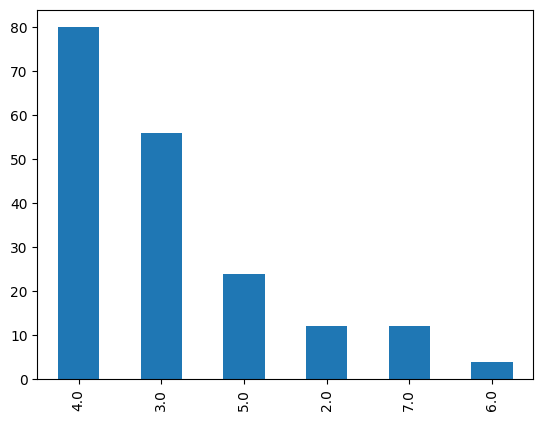

In [9]:
inspect_df['medianReadsPerBarcode'].value_counts().plot(kind='bar')